In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import pandas as pd
# Charger le jeu de données
df = pd.read_csv("tsne_scores.csv")
print(df.shape)

(4406, 2)


In [3]:

import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 car la fonction kneighbors retourne la distance du point à lui-même (c'est-à-dire que la première colonne sera remplie de zéros)
nbrs = NearestNeighbors(n_neighbors=5).fit(df)

# Trouver les k-voisins d'un point
neigh_dist, neigh_ind = nbrs.kneighbors(df)

# Trier les distances des voisins (longueurs jusqu'aux points) par ordre croissant
# axis = 0 représente le tri le long du premier axe, c'est-à-dire le tri le long des lignes
sort_neigh_dist = np.sort(neigh_dist, axis=0)


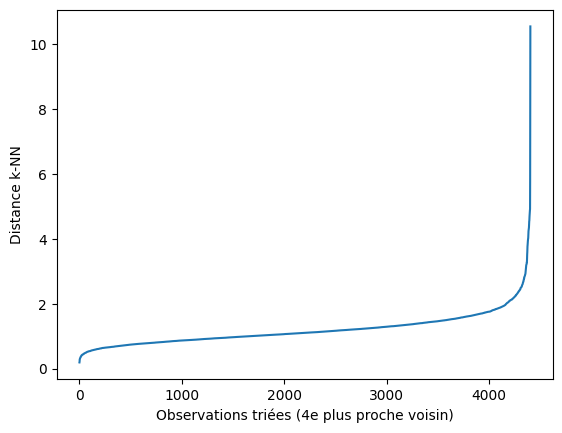

In [4]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("Distance k-NN")
plt.xlabel("Observations triées (4e plus proche voisin)")
plt.show()

In [5]:
# Utiliser KneeLocator pour trouver le point de coude
kneedle = KneeLocator(x=range(1, len(neigh_dist)+1), y=k_dist, S=1.0, curve="concave", direction="increasing", online=True)
optimal_epsilon = kneedle.knee_y

In [6]:
# Afficher le point de coude estimé
print(optimal_epsilon)

4.5445133515748894


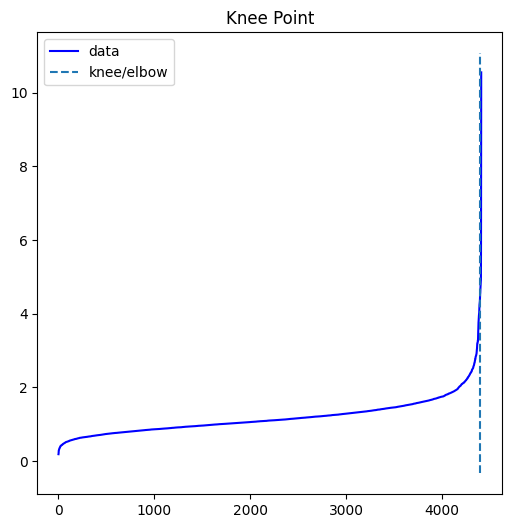

In [7]:
kneedle.plot_knee()
plt.show()


In [8]:

# Créer des clusters avec les paramètres eps=4.54 et min_samples=4
clusters = DBSCAN(eps=4.54, min_samples=4).fit(df)

# Obtenir les étiquettes des clusters
cluster_labels = clusters.labels_

# Résultat
print(cluster_labels)

# Vérifier les clusters uniques
unique_clusters = set(cluster_labels)
print(unique_clusters)


[0 0 1 ... 1 1 1]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}


In [11]:
Counter(clusters.labels_)

Counter({1: 1524,
         0: 870,
         2: 769,
         3: 301,
         7: 283,
         5: 246,
         6: 232,
         4: 153,
         8: 11,
         10: 8,
         9: 6,
         -1: 3})

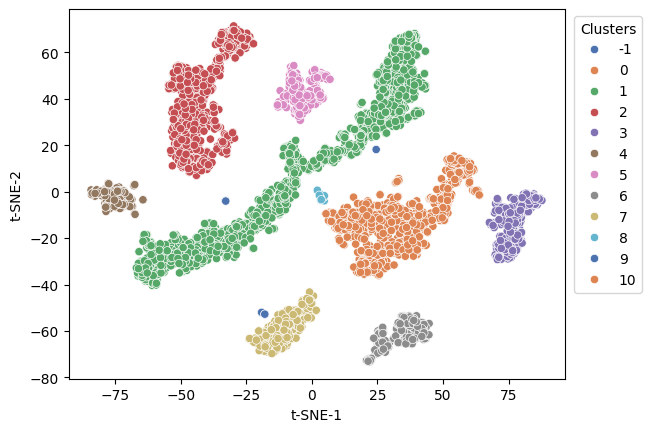

In [10]:
p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()